In [34]:
%matplotlib inline
import pandas as pd
import seaborn as sns

titanic = pd.read_csv('../data/titanic.csv', index_col=0)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: ylabel='Frequency'>

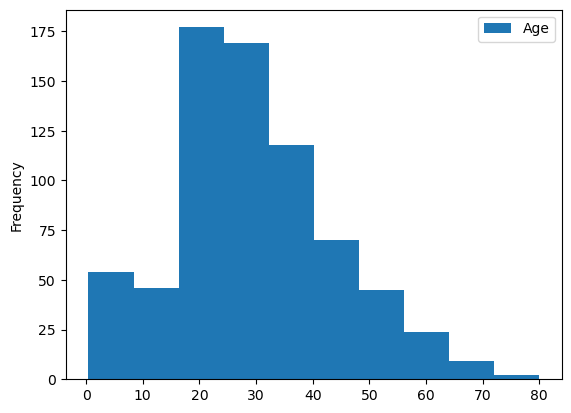

In [5]:
# 1. 타이타닉의 승객은 30대와 40대가 가장 많다? -> 히스토그램, 나이 분포 확인.
titanic.plot(kind='hist', y='Age')  # 20-30대가 가장 많으므로 X

In [9]:
# 2. 가장 높은 요금을 낸 사람은 30대이다. -> df를 요금 기준으로 내림차순 정렬
titanic.sort_values(by='Fare', ascending=False).head()  # 1순위가 35세이므로 O

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [12]:
# 3. 생존자가 사망자보다 더 많다.
titanic['Survived'].value_counts()  # 0(사망)이 549명으로 1(생존) 342명보다 많으므로 X

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
# 4. 1등실, 2등실, 3등실 중 가장 많은 사람이 탑승한 곳은 3등실이다.
titanic['Pclass'].value_counts()  # 3등실 탑승객이 491명으로 가장 많아서 O

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='Survived'>

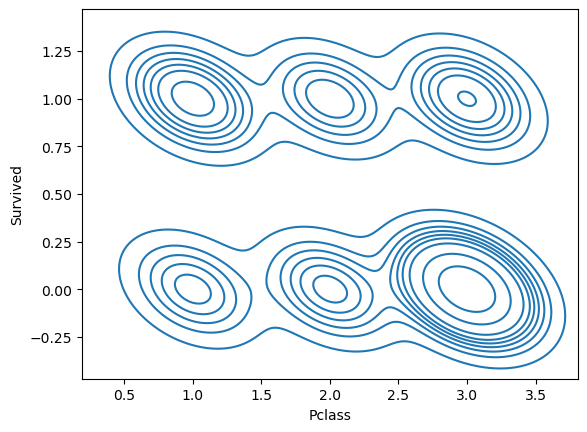

In [38]:
# 5. 가장 생존율이 높은 객실 등급은 1등실이다.
# titanic.plot(kind='scatter', x='Pclass', y='Survived')  # 점이 겹쳐져서 알아보기 힘듦.
# KDE plot 활용하기
sns.kdeplot(x=titanic['Pclass'], y=titanic['Survived'])

<Axes: xlabel='Survived', ylabel='Age'>

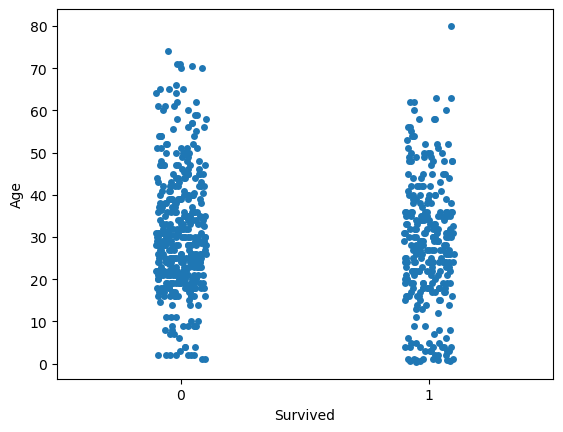

In [39]:
# 6. 나이가 어릴수록 생존율이 높다.
sns.stripplot(data=titanic, x="Survived", y='Age')  # 분포를 잘 확인할 수 없음.

<Axes: xlabel='Survived', ylabel='Age'>

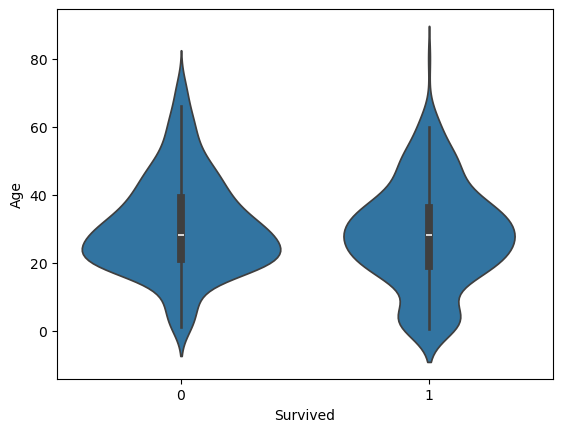

In [40]:
# 바이올린 플롯으로 생존자/사망자별 나이 분포 확인하기
sns.violinplot(data=titanic, x='Survived', y='Age')
# 사망한 사람과 생존한 사람의 나이 분포에는 큰 차이 X

<Axes: xlabel='Survived', ylabel='Age'>

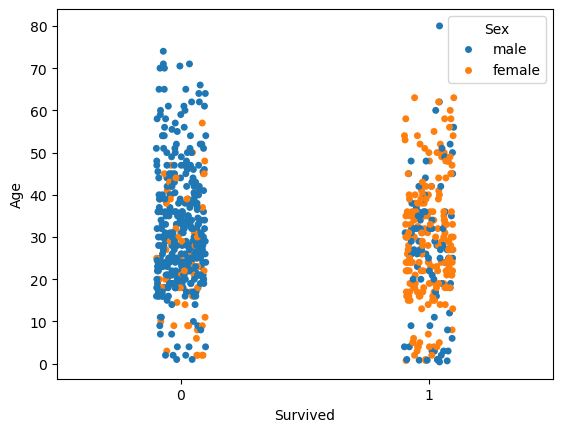

In [41]:
# 7. 나이보다 성별이 생존율에 더 많은 영향을 미친다.
sns.stripplot(data=titanic, x='Survived', y='Age', hue='Sex')
# 0에는 남성이, 1에는 여성이 더 많이 분포해 있음.